In [1]:
import pandas as pd
dados = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\AgricultureData.xlsx')

## **.Verifica os 5 produtos mais vendidos de toda tabela** 

In [2]:

produtos_mais_vendidos = dados.groupby(['product_id', 'product_name'])['units_sold_kg'].sum().reset_index()

produtos_mais_vendidos = produtos_mais_vendidos.sort_values(by='units_sold_kg', ascending=False)

print(produtos_mais_vendidos.head(5)) 

                              product_id product_name  units_sold_kg
10  4a0f8862-c851-4073-bc17-3a3d93834902         Beef        6067582
20  9bb2d8db-a7ac-4d40-9d3c-0c96cafe7153       Butter        5881846
13  6c8adfc3-2114-4b78-a3e2-2269a6a0dc02         Milk        5856116
21  b12c721e-8301-4b08-8ac3-d435be9b8b32         Lamb        5827478
11  57ad2178-9598-4981-b0f7-78a91162821e       Cheese        5697881


## **.Busca em cada mês do ano a quantidade dos top 5 produtos mais vendidos**

In [ ]:
import pandas as pd

# Carregar os dados
dados = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\AgricultureData.xlsx')
dados['sale_date'] = pd.to_datetime(dados['sale_date'])

# Adicionar a coluna de mês (1 para Janeiro, 2 para Fevereiro, etc.)
dados['month'] = dados['sale_date'].dt.month

# Obter os 5 produtos mais vendidos no ano inteiro
top_produtos_geral = (
    dados.groupby('product_name')['units_sold_kg']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrar os dados para incluir apenas os produtos mais vendidos no ano inteiro
dados_top = dados[dados['product_name'].isin(top_produtos_geral)]

# Criar os dicionários para cada mês
dicionarios_meses = {}
for mes in range(1, 13):  # De Janeiro (1) a Dezembro (12)
    # Filtrar dados para o mês específico
    vendas_mes = (
        dados_top[dados_top['month'] == mes]
        .groupby('product_name')['units_sold_kg']
        .sum()
        .sort_values(ascending=False)
        .head(10)  # Considerar apenas os 5 produtos mais vendidos no mês
        .to_dict()
    )
    dicionarios_meses[mes] = vendas_mes

# Exibir os dicionários criados
meses_nomes = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

for mes, dados in dicionarios_meses.items():
    print(f"{meses_nomes[mes]}:")
    print(dados)
    print()


Janeiro:
{'Butter': 635519, 'Lamb': 609837, 'Milk': 489420, 'Yogurt': 470586, 'Beef': 453588}

Fevereiro:
{'Yogurt': 687512, 'Pork': 635236, 'Milk': 615158, 'Beef': 559293, 'Butter': 517080}

Março:
{'Butter': 651158, 'Yogurt': 546975, 'Cheese': 511407, 'Beef': 493428, 'Chicken': 490467}

Abril:
{'Lamb': 551841, 'Beef': 516776, 'Pork': 470929, 'Butter': 427200, 'Cheese': 424340}

Maio:
{'Beef': 623426, 'Lamb': 622128, 'Butter': 588673, 'Cheese': 557950, 'Yogurt': 502237}

Junho:
{'Lamb': 709068, 'Chicken': 534790, 'Beef': 513615, 'Milk': 480535, 'Pork': 469022}

Julho:
{'Cheese': 572447, 'Chicken': 517404, 'Butter': 506681, 'Lamb': 497028, 'Beef': 491679}

Agosto:
{'Chicken': 624762, 'Butter': 571199, 'Milk': 539716, 'Beef': 530207, 'Pork': 470959}

Setembro:
{'Chicken': 557959, 'Milk': 538654, 'Beef': 535886, 'Cheese': 510252, 'Yogurt': 442326}

Outubro:
{'Lamb': 576349, 'Cheese': 563148, 'Chicken': 531075, 'Beef': 526658, 'Pork': 496356}

Novembro:
{'Yogurt': 694846, 'Milk': 556103, 

## **.Plotagem de grafico com os valores vendidos de cada um dos top 5 produtos ao longo do ano**

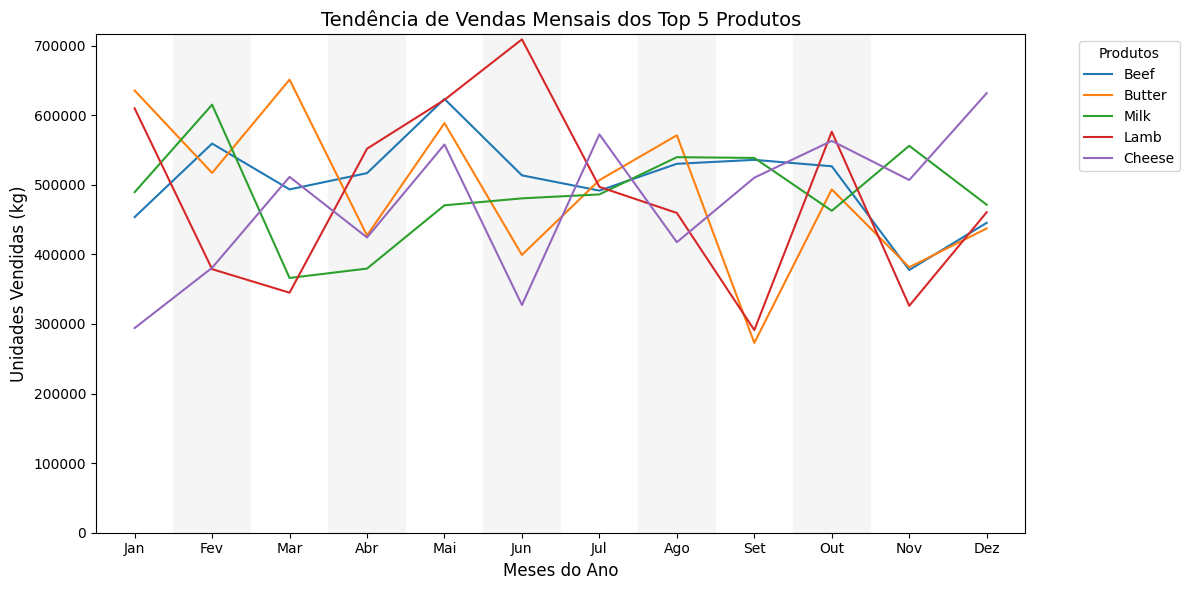

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# Carregar os dados
dados = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\AgricultureData.xlsx')
dados['sale_date'] = pd.to_datetime(dados['sale_date'])

# Adicionar a coluna de mês
dados['month'] = dados['sale_date'].dt.month

# Obter os 5 produtos mais vendidos no ano inteiro
top_produtos_geral = (
    dados.groupby('product_name')['units_sold_kg']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar os dados para incluir apenas os produtos mais vendidos no ano inteiro
dados_top = dados[dados['product_name'].isin(top_produtos_geral)]

# Criar os dicionários para cada mês
dicionarios_meses = {}
for mes in range(1, 13):
    vendas_mes = (
        dados_top[dados_top['month'] == mes]
        .groupby('product_name')['units_sold_kg']
        .sum()
        .to_dict()
    )
    dicionarios_meses[mes] = vendas_mes

# Preparar os dados para o gráfico
meses = list(range(1, 13))
produtos = list(top_produtos_geral)
valores_por_mes = {
    produto: [dicionarios_meses.get(mes, {}).get(produto, 0) for mes in meses]
    for produto in produtos
}

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado (branco e cinza claro) para os meses
for i in range(len(meses)):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.add_patch(patches.Rectangle((i - 0.5, 0), 1, max(max(valores_por_mes.values())) * 1.1, color=cor, zorder=0))

# Adicionar as linhas para cada produto
for produto, valores in valores_por_mes.items():
    ax.plot(meses, valores, label=produto)

# Configurar os eixos
ax.set_xticks(meses)
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Unidades Vendidas (kg)', fontsize=12)
ax.set_title('Tendência de Vendas Mensais dos Top 5 Produtos', fontsize=14)

# Ajustar os limites dos eixos
ax.set_ylim(0, max(max(valores_por_mes.values())) * 1.1)
ax.set_xlim(0.5, 12.5)

# Adicionar a grade
ax.grid(False)  # Desativar a grade

# Adicionar legenda
ax.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


## **.Verificando a quantidade dos top 5 produtos por estação do ano**

In [18]:
import pandas as pd
dados = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\AgricultureData.xlsx')
dados['sale_date'] = pd.to_datetime(dados['sale_date'])

# Determinar as estações com base na coluna 'sale_date'
def get_season(month):
    if month in [3, 4, 5]:  # Março, Abril, Maio -> Primavera
        return 'Primavera'
    elif month in [6, 7, 8]:  # Junho, Julho, Agosto -> Verão
        return 'Verao'
    elif month in [9, 10, 11]:  # Setembro, Outubro, Novembro -> Outono
        return 'Outono'
    else:  # Dezembro, Janeiro, Fevereiro -> Inverno
        return 'Inverno'

# Adicionar a estação como uma nova coluna
dados['season'] = dados['sale_date'].dt.month.apply(get_season)

# Obter os 10 produtos mais vendidos no ano de 2022
top_produtos = (
    dados.groupby('product_name')['units_sold_kg']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filtrar os dados apenas para os 10 produtos mais vendidos
dados_top = dados[dados['product_name'].isin(top_produtos)]

# Criar os dicionários para cada estação
dicionarios_estacoes = {}
for estacao in ['Primavera', 'Verao', 'Outono', 'Inverno']:
    # Agrupar por produto e calcular as vendas por estação
    vendas_estacao = (
        dados_top[dados_top['season'] == estacao]
        .groupby('product_name')['units_sold_kg']
        .sum()
        .to_dict()
    )
    dicionarios_estacoes[estacao] = vendas_estacao

# Exibir os dicionários criados
for estacao, dados in dicionarios_estacoes.items():
    print(f"{estacao}:")
    print(dados)
    print()


Primavera:
{'Beef': 1633630, 'Butter': 1667031, 'Cheese': 1493697, 'Lamb': 1518938, 'Milk': 1216295}

Verao:
{'Beef': 1535501, 'Butter': 1477131, 'Cheese': 1317227, 'Lamb': 1665671, 'Milk': 1506465}

Outono:
{'Beef': 1440160, 'Butter': 1147766, 'Cheese': 1580320, 'Lamb': 1193689, 'Milk': 1557414}

Inverno:
{'Beef': 1458291, 'Butter': 1589918, 'Cheese': 1306637, 'Lamb': 1449180, 'Milk': 1575942}



## **.Plotagem de grafico com a quantidade dos top 5 produtos por estação do ano**

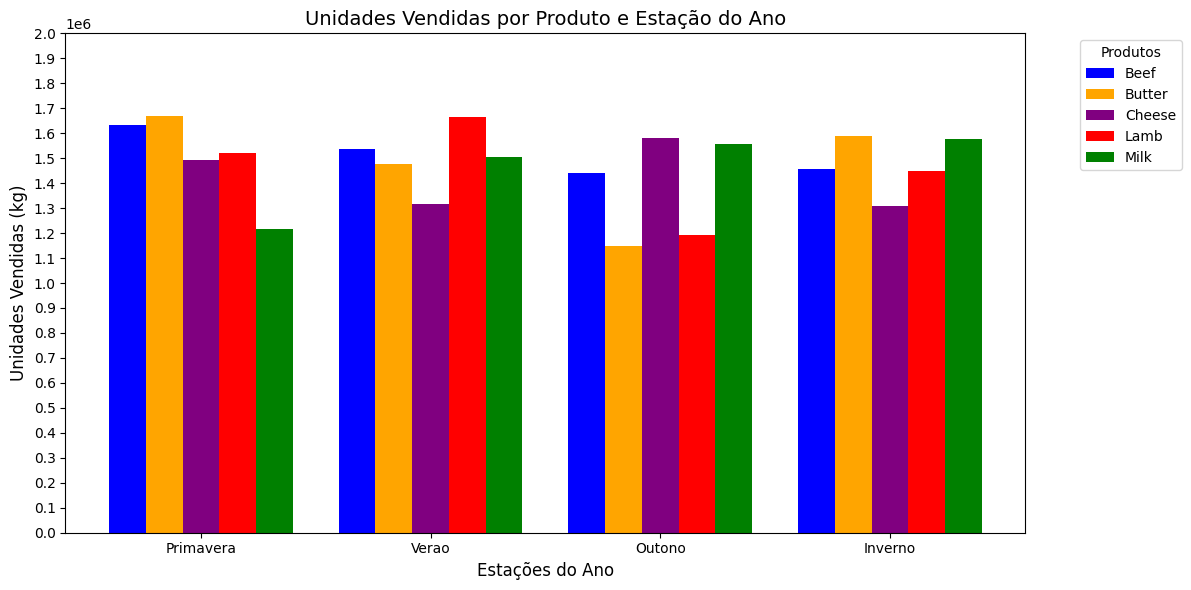

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Dados para o gráfico
estacoes = ['Primavera', 'Verao', 'Outono', 'Inverno']
produtos = list(dicionarios_estacoes['Primavera'].keys())
valores_por_estacao = [[dicionarios_estacoes[estacao].get(produto, 0) for produto in produtos] for estacao in estacoes]

# Mapeamento de cores para os produtos
cores_produtos = {
    'Beef': 'blue',
    'Butter': 'orange',
    'Milk': 'green',
    'Lamb': 'red',
    'Cheese': 'purple',
}

# Configuração do gráfico
bar_width = 0.8 / len(produtos)  # Largura de cada barra (ajustado para caber no grupo)
x = np.arange(len(estacoes))  # Posições para as estações

# Criar a figura
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar as barras ao gráfico
for i, produto in enumerate(produtos):
    valores = [valores_por_estacao[j][i] for j in range(len(estacoes))]
    cor = cores_produtos.get(produto, 'gray')  # Pega a cor definida, ou 'gray' se o produto não estiver no mapeamento
    ax.bar(x + i * bar_width, valores, bar_width, label=produto, color=cor)

# Configurar os eixos
ax.set_xlabel('Estações do Ano', fontsize=12)
ax.set_ylabel('Unidades Vendidas (kg)', fontsize=12)
ax.set_title('Unidades Vendidas por Produto e Estação do Ano', fontsize=14)
ax.set_xticks(x + bar_width * (len(produtos) - 1) / 2)
ax.set_xticklabels(estacoes)

# Ajustar a escala do eixo vertical para 100 mil em 100 mil até 2 milhões
ax.set_ylim(0, 2000000)
ax.set_yticks(range(0, 2100000, 100000))

# Adicionar legenda
ax.legend(title='Produtos', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout e mostrar o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_12344\788067865.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


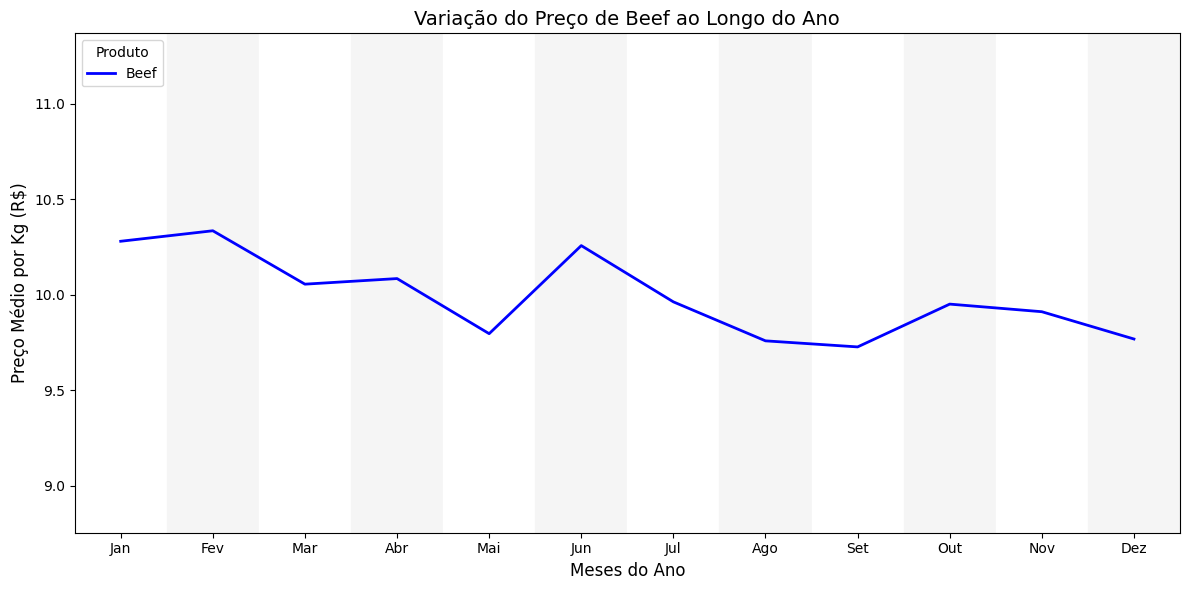

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\AgricultureData.xlsx')
dados['sale_date'] = pd.to_datetime(dados['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Beef'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'blue'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados[dados['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_12344\1099388105.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


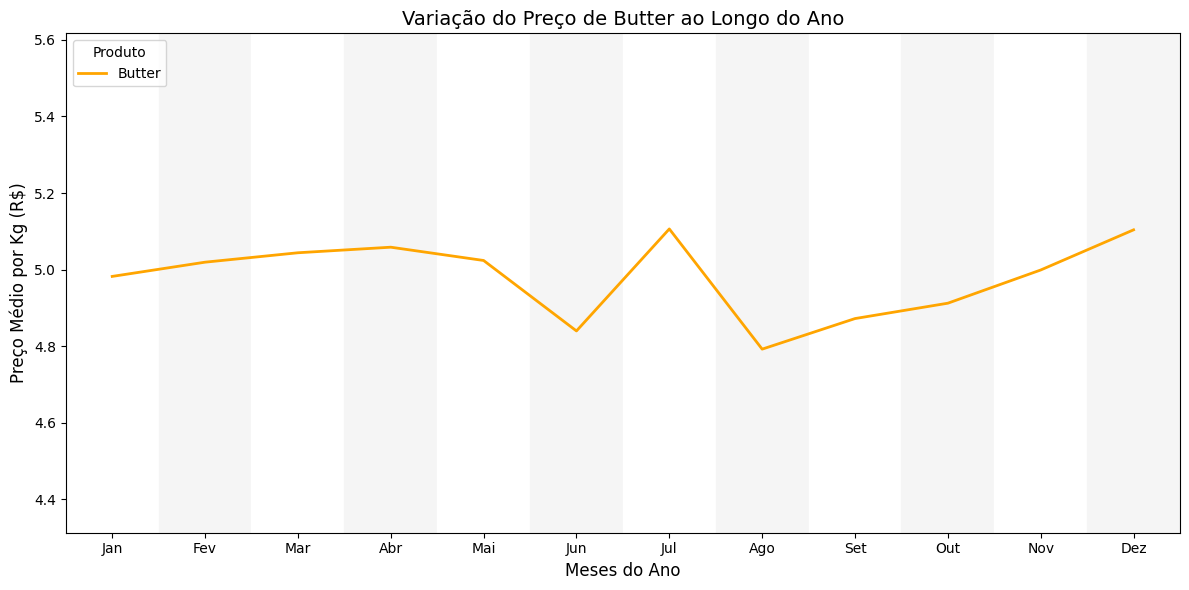

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\AgricultureData.xlsx')
dados['sale_date'] = pd.to_datetime(dados['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Butter'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'orange'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados[dados['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_12344\3820181590.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


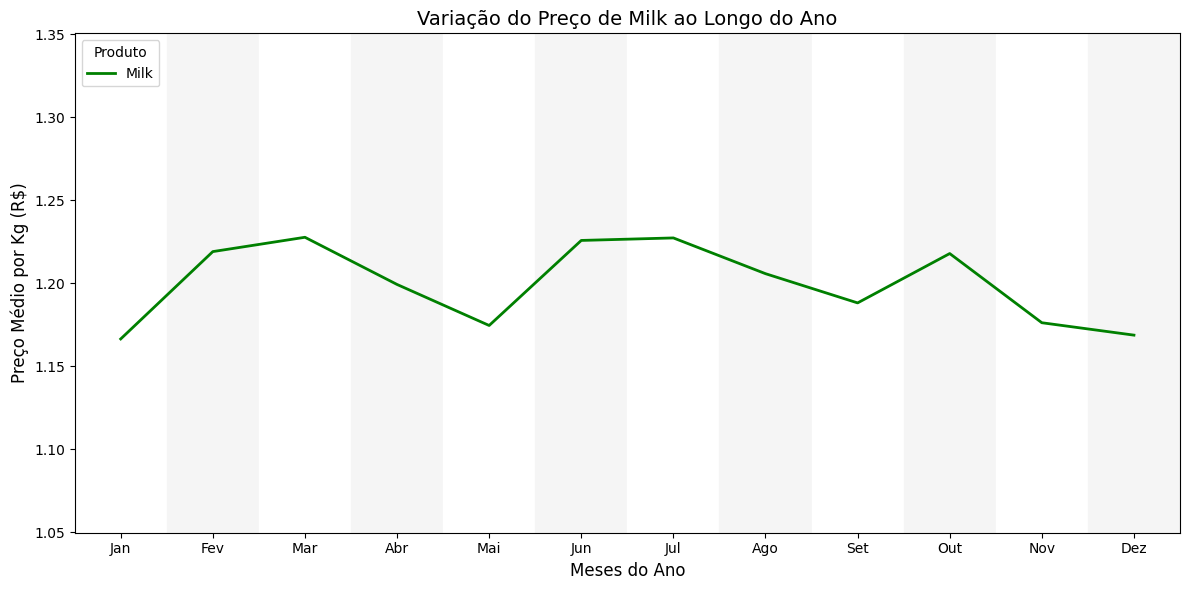

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\AgricultureData.xlsx')
dados['sale_date'] = pd.to_datetime(dados['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Milk'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'green'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados[dados['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_12344\2148441899.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


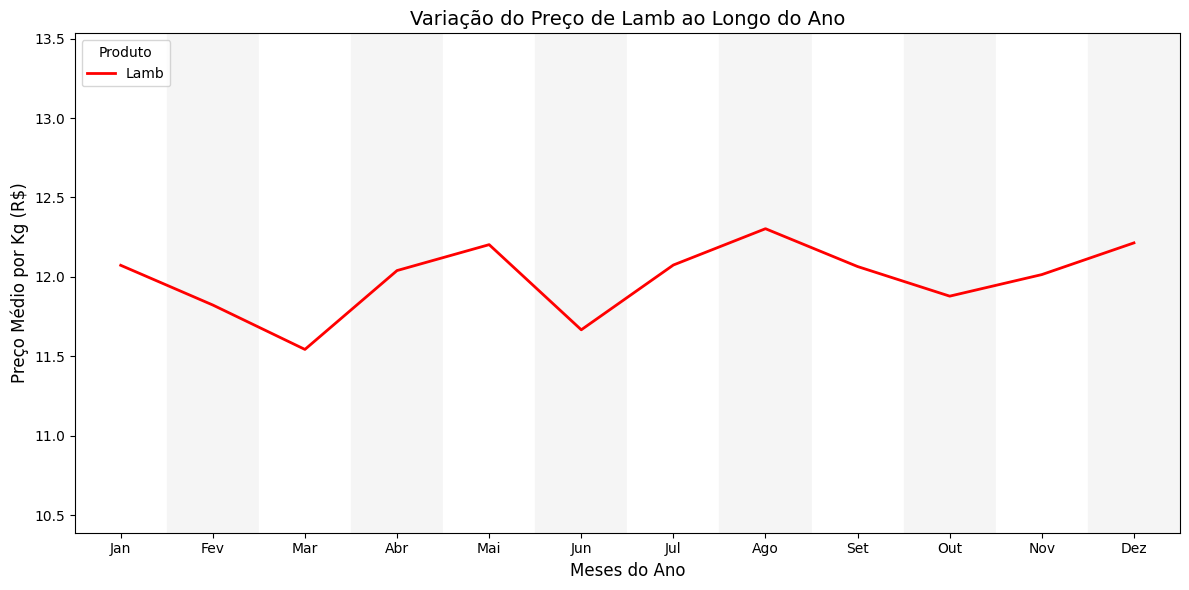

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\AgricultureData.xlsx')
dados['sale_date'] = pd.to_datetime(dados['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Lamb'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'red'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados[dados['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


C:\Users\enzov\AppData\Local\Temp\ipykernel_12344\3700258994.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_produto['month'] = dados_produto['sale_date'].dt.month


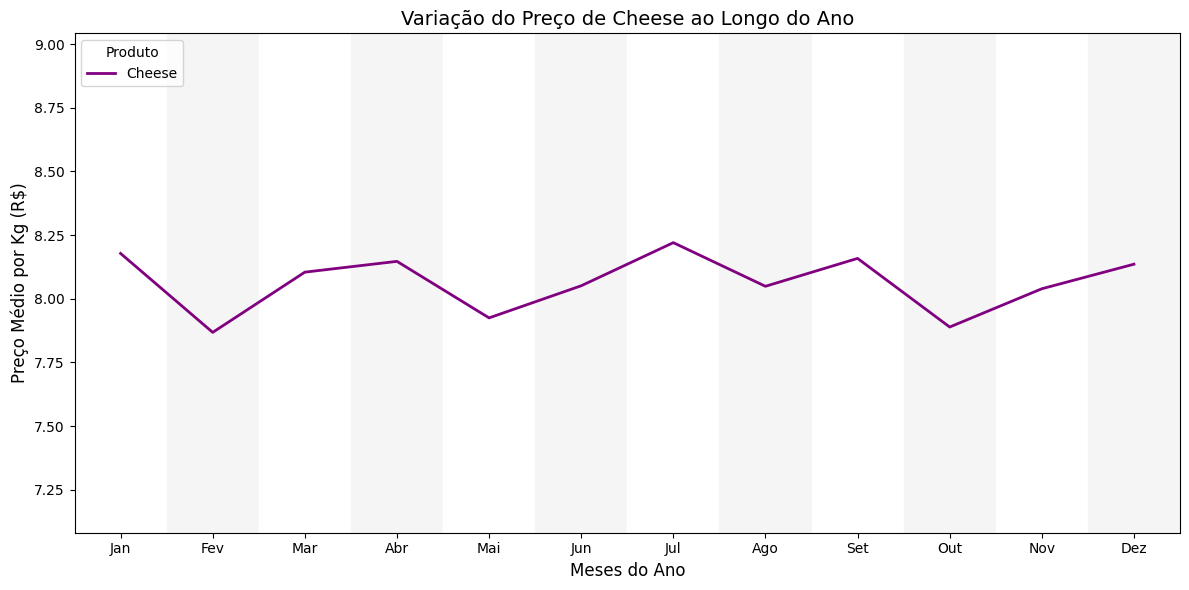

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Carregar os dados
dados = pd.read_excel(r'C:\\Users\\enzov\\Desktop\\FACULDADE\\2024-2\\ESTATISTICA\\Analise Descritiva Banco de Dados\\AgricultureData.xlsx')
dados['sale_date'] = pd.to_datetime(dados['sale_date'])

# Filtrar apenas o produto "Beef" (TROCAR AQUI PARA OUTROS PRODUTOS)
produto = 'Cheese'  # Altere o nome do produto aqui para outros gráficos
cor_produto = 'purple'  # Cor da linha (mude se desejar destacar com outra cor)

dados_produto = dados[dados['product_name'] == produto]

# Agrupar por mês e calcular a média do preço
dados_produto['month'] = dados_produto['sale_date'].dt.month
media_precos = (
    dados_produto.groupby('month')['price_per_kg']
    .mean()
    .sort_index()
)

# Plotar o gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Adicionar o fundo alternado para os meses
for i in range(1, 13):
    cor = 'whitesmoke' if i % 2 == 0 else 'white'
    ax.axvspan(i - 0.5, i + 0.5, color=cor, zorder=0)

# Adicionar a linha do produto
ax.plot(media_precos.index, media_precos.values, label=produto, color=cor_produto, linewidth=2)

# Configurar os eixos
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], fontsize=10)
ax.set_xlabel('Meses do Ano', fontsize=12)
ax.set_ylabel('Preço Médio por Kg (R$)', fontsize=12)
ax.set_title(f'Variação do Preço de {produto} ao Longo do Ano', fontsize=14)

# Ajustar os limites dos eixos
ax.set_xlim(0.5, 12.5)
ax.set_ylim(media_precos.min() * 0.9, media_precos.max() * 1.1)

# Adicionar grade e legenda
ax.grid(False)  # Desativar grade principal
ax.legend(title='Produto', loc='upper left')

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()